In [100]:
import sys
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_market_calendars as mcal
sys.path.append('../lib/')
from functions import *
import yahoo_fin.options as ops

In [101]:
maturity = '07/15/2022' # in the format 'mm/dd/yyyy'
df_calls = ops.get_calls(ticker='^spx', date=maturity)
df_puts = ops.get_puts(ticker="^spx", date=maturity)

df_puts['Last Trade Date'] = pd.to_datetime(df_puts['Last Trade Date'])
df_calls['Last Trade Date'] = pd.to_datetime(df_calls['Last Trade Date'])

/home/manuel/.local/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/home/manuel/.local/lib/python3.10/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [124]:
pd.to_datetime(maturity, format='%m/%d/%Y').strftime('%d/%m/%Y')

'15/07/2022'

In [102]:
df_puts

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility
0,SPX220715P00200000,2022-04-21 15:22:00,200.0,0.03,0.00,0.05,0.0,-,1,79,180.47%
1,SPX220715P00400000,2022-04-25 14:18:00,400.0,0.05,0.00,0.05,0.0,-,25,82,138.28%
2,SPX220715P00600000,2022-04-27 16:12:00,600.0,0.15,0.05,0.20,0.0,-,50,3133,127.73%
3,SPX220715P00800000,2022-04-27 16:12:00,800.0,0.35,0.20,0.35,0.0,-,25,1721,115.92%
4,SPX220715P01000000,2022-04-27 11:07:00,1000.0,0.60,0.35,0.60,0.0,-,4,2062,105.44%
...,...,...,...,...,...,...,...,...,...,...,...
252,SPX220715P06500000,2022-03-24 09:52:00,6500.0,2027.56,0.00,0.00,0.0,-,1,2,0.00%
253,SPX220715P06600000,2022-03-24 09:52:00,6600.0,2127.36,0.00,0.00,0.0,-,1,1,0.00%
254,SPX220715P06800000,2022-04-14 12:21:00,6800.0,2381.09,2577.30,2588.70,0.0,-,13,14,43.53%
255,SPX220715P07200000,2022-04-18 11:04:00,7200.0,2795.10,2977.60,2989.10,0.0,-,-,77,48.59%


In [103]:
file_path = '../Data/'

year = 2022
file_name = f'daily-treasury-rates_{year}.csv'
df = read_gold_data(file_path + file_name)
df.Date = pd.to_datetime(df.Date, format='%d/%m/%Y')

date = '2022-04-27'
# yield of return at 3 months
r = df.loc[df.Date == date, '3 Mo'].to_numpy()[0]

df

,Date,1 Mo,2 Mo,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2022-01-03,0.05,0.06,0.08,0.22,0.40,0.78,1.04,1.37,1.55,1.63,2.05,2.01
1,2022-01-04,0.06,0.05,0.08,0.22,0.38,0.77,1.02,1.37,1.57,1.66,2.10,2.07
2,2022-01-05,0.05,0.06,0.09,0.22,0.41,0.83,1.10,1.43,1.62,1.71,2.12,2.09
3,2022-01-06,0.04,0.05,0.10,0.23,0.45,0.88,1.15,1.47,1.66,1.73,2.12,2.09
4,2022-01-07,0.05,0.05,0.10,0.24,0.43,0.87,1.17,1.50,1.69,1.76,2.15,2.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2022-04-21,0.50,0.65,0.83,1.32,2.01,2.68,2.87,2.96,2.96,2.90,3.12,2.94
76,2022-04-22,0.46,0.64,0.83,1.34,2.06,2.72,2.88,2.94,2.95,2.90,3.14,2.95
77,2022-04-25,0.40,0.61,0.91,1.42,2.03,2.63,2.79,2.84,2.85,2.81,3.06,2.88
78,2022-04-26,0.38,0.61,0.83,1.40,1.99,2.54,2.72,2.79,2.80,2.77,3.03,2.86


In [104]:
# Set end date
end = dt.datetime.now()
# Set start date (1 year distance)
start = end - dt.timedelta(weeks=52)

# We concentrate on the Standard and Poor's 500 Index
GSPC_df = read_data_from_yahoo('^GSPC', start, end)
GSPC_df['Date'] = pd.to_datetime(GSPC_df['Date'],
                                 format='%Y-%m-%d')

In [105]:
GSPC_df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-04-29,4218.779785,4176.810059,4206.140137,4211.470215,4288940000,4211.470215
1,2021-04-30,4198.100098,4174.850098,4198.100098,4181.169922,4273680000,4181.169922
2,2021-05-03,4209.390137,4188.029785,4191.979980,4192.660156,4061170000,4192.660156
3,2021-05-04,4179.040039,4128.589844,4179.040039,4164.660156,4441080000,4164.660156
4,2021-05-05,4187.720215,4160.939941,4177.060059,4167.589844,4029050000,4167.589844
...,...,...,...,...,...,...,...
248,2022-04-22,4385.830078,4267.620117,4385.830078,4271.779785,3930660000,4271.779785
249,2022-04-25,4299.020020,4200.819824,4255.339844,4296.120117,4061070000,4296.120117
250,2022-04-26,4278.140137,4175.040039,4278.140137,4175.200195,3760420000,4175.200195
251,2022-04-27,4240.709961,4162.899902,4186.520020,4183.959961,3876340000,4183.959961


In [106]:
df_calls['Last Trade Date'] = pd.to_datetime(df_calls['Last Trade Date'],
                                             format='%Y-%m-%d').dt.strftime('%Y-%m-%d')

df_puts['Last Trade Date'] = pd.to_datetime(df_puts['Last Trade Date'],
                                             format='%Y-%m-%d').dt.strftime('%Y-%m-%d')


In [107]:
cols = ['Contract Name', 'Last Trade Date', 'Strike']
df_merge = df_calls[cols].merge(
    df_puts[cols],
    on=['Last Trade Date', 'Strike'],
    how='inner',
    suffixes=[' call', ' put']
    )

call_contracts = df_merge['Contract Name call']
put_contracts = df_merge['Contract Name put']

df_merge

,Contract Name call,Last Trade Date,Strike,Contract Name put
0,SPX220715C00200000,2022-04-21,200.0,SPX220715P00200000
1,SPXW220715C03900000,2022-04-27,3900.0,SPXW220715P03900000
2,SPX220715C03990000,2022-04-27,3990.0,SPX220715P03990000
3,SPXW220715C04125000,2022-04-27,4125.0,SPXW220715P04125000
4,SPXW220715C04160000,2022-04-27,4160.0,SPX220715P04160000
5,SPXW220715C04180000,2022-04-27,4180.0,SPXW220715P04180000
6,SPXW220715C04190000,2022-04-27,4190.0,SPXW220715P04190000
7,SPX220715C04210000,2022-04-27,4210.0,SPXW220715P04210000
8,SPX220715C04220000,2022-04-27,4220.0,SPXW220715P04220000
9,SPX220715C04250000,2022-04-28,4250.0,SPX220715P04250000


In [108]:
tmp_put = df_puts[df_puts['Contract Name'].isin(put_contracts)].reset_index(drop=True)
tmp_call = df_calls[df_calls['Contract Name'].isin(call_contracts)].reset_index(drop=True)

In [130]:
# Put-call parity equation: C0 - P0 = S0 - K / (1 + r)

C0 = tmp_call['Last Price']
P0 = tmp_put['Last Price']
K = tmp_put['Strike']

S0 = tmp_put['Last Trade Date'].map(GSPC_df.set_index('Date')['Adj Close'])

res = pd.DataFrame(columns=['Date', 'C0', 'P0', 'K', 'S0', 'r'])
res['Date'] = pd.to_datetime(tmp_call['Last Trade Date'],
                             format='%Y-%m-%d')
res['C0'] = tmp_call['Last Price']
res['P0'] = tmp_put['Last Price']
res['K'] = tmp_put['Strike']
res['S0'] = tmp_put['Last Trade Date'].map(GSPC_df.set_index('Date')['Adj Close'])
res['r'] = [r] * len(res)

#res['C0 - P0'] = res['C0'] - res['P0']
#res['S0 - K / (1 + r)'] = res['S0'] - res['K'] / (1 + res['r'])

res['(S0 - C0 + P0) (1 + r)'] = (res['S0'] - res['C0'] + res['P0']) * (1 + res['r'])

res

,Date,C0,P0,K,S0,r,(S0 - C0 + P0) (1 + r)
0,2022-04-21,4184.19,0.03,200.0,4393.660156,0.82,381.290284
1,2022-04-27,388.90,108.65,3900.0,4183.959961,0.82,7104.752129
2,2022-04-27,337.16,127.10,3990.0,4183.959961,0.82,7232.497929
3,2022-04-27,228.20,172.61,4125.0,4183.959961,0.82,7513.633329
4,2022-04-27,225.37,189.75,4160.0,4183.959961,0.82,7549.978729
5,2022-04-27,195.20,176.28,4180.0,4183.959961,0.82,7580.372729
6,2022-04-27,201.80,181.73,4190.0,4183.959961,0.82,7578.279729
7,2022-04-27,181.70,185.45,4210.0,4183.959961,0.82,7621.632129
8,2022-04-27,178.05,208.38,4220.0,4183.959961,0.82,7670.007729
9,2022-04-28,169.34,203.20,4250.0,4204.100098,0.82,7713.087378


In [131]:
coeff = np.polyfit(x=res['K'],
                   y=res['(S0 - C0 + P0) (1 + r)'],
                   deg=1)

y_fit = res['K'] * coeff[0] + coeff[1]

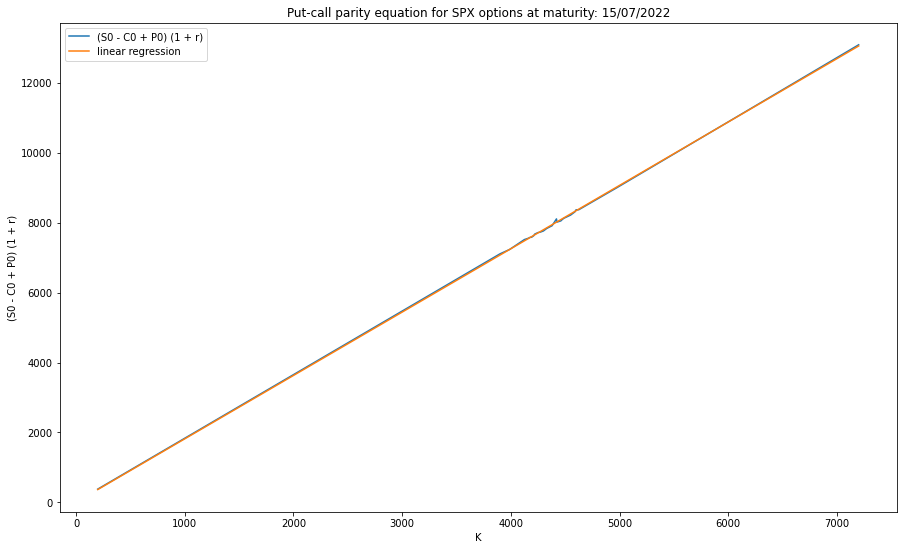

In [138]:
fig, ax = plt.subplots(figsize=(15, 9))
res.plot(x='K', y='(S0 - C0 + P0) (1 + r)', ax=ax, legend=False)
ax.plot(res['K'], y_fit)
ax.set_ylabel('(S0 - C0 + P0) (1 + r)')
plt.legend(labels=['(S0 - C0 + P0) (1 + r)', 'linear regression'])
maturity_dt = pd.to_datetime(maturity, format='%m/%d/%Y').strftime('%d/%m/%Y')
plt.title(f'Put-call parity equation for SPX options at maturity: {maturity_dt}')
plt.savefig('../Images/Put_call_parity_eq.png', dpi=800)

In [134]:
np.arctan(coeff[0]) / np.pi * 180

61.09251508494736